## ETH price statistics
This note analyzes the statics of the ETH/USD data downloaded from Binance. The time ranges from 2022/12/31 to 2023/10/7 and the time interval is set to be 1 minute.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
from download_binance import * 

symbols = ["ETH"]
period = "1m"
start = datetime.datetime(2023, 1,  1, 0, 0)
end   = datetime.datetime(2023, 10, 1, 0, 0)

for i, symbol in enumerate( symbols[:] ):

    print(f"Begin downloading: H1-{symbol}")
    df = get_data_since(symbol, start, end, period )
    print(f"Download completed: H1-{symbol}")


price_array = np.array([])
L = len(df.index)
for t in range(L) :
    '''if t%(L//100)== 0:
        print(t)'''
    price_array = np.append(price_array , (df.loc[t , "open" ]+df.loc[t , "close" ])/2)

log_price_array = np.log(price_array)
r_array = np.diff( log_price_array)

time = np.array([df.loc[t,'timestamp'] for t in range( len(df['timestamp']) ) ])

Begin downloading: H1-ETH
Download completed: H1-ETH


### Price path

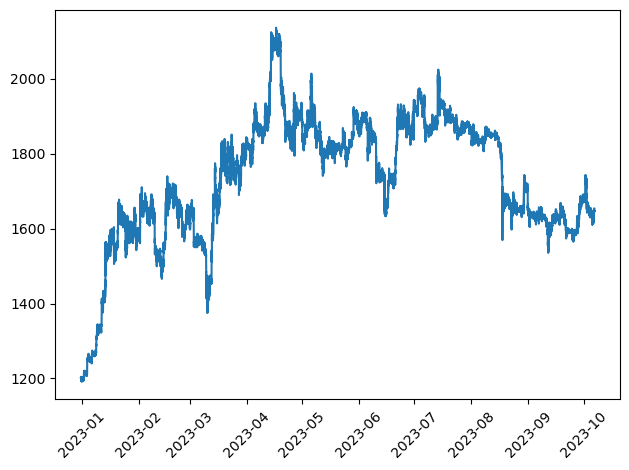

In [434]:
plt.plot(time,price_array)
plt.xticks(rotation=45)
plt.tight_layout()

### Basic statistics

In [281]:
pd.DataFrame(  {"mean" : [np.mean(r_array)] ,
"var" : [np.var(r_array)]  ,
"med" : [np.median(r_array)] ,
"skew" : [sci.stats.skew(r_array)] ,
"kur" : [sci.stats.kurtosis(r_array)] } , index =["values"] )

,mean,var,med,skew,kur
values,7.797908e-07,1.977528e-07,0.0,-0.402118,145.809121


### Stylized fact: tail of empirical distribution
The empirical distribution of financial returns and log-return are fat-tailed.
The folloing graph from data shows that the tail of empirical distribution lies between those from $N(0,\sigma^2)$and levy stable $\alpha = 0.42$ ,  $\beta = 0$,loc=0,scale=$\frac{\sigma}{\sqrt{2}}$ where $\sigma$ is the empirical std of the retrun. (also the log probability distribution)

(0.0, 200.0)

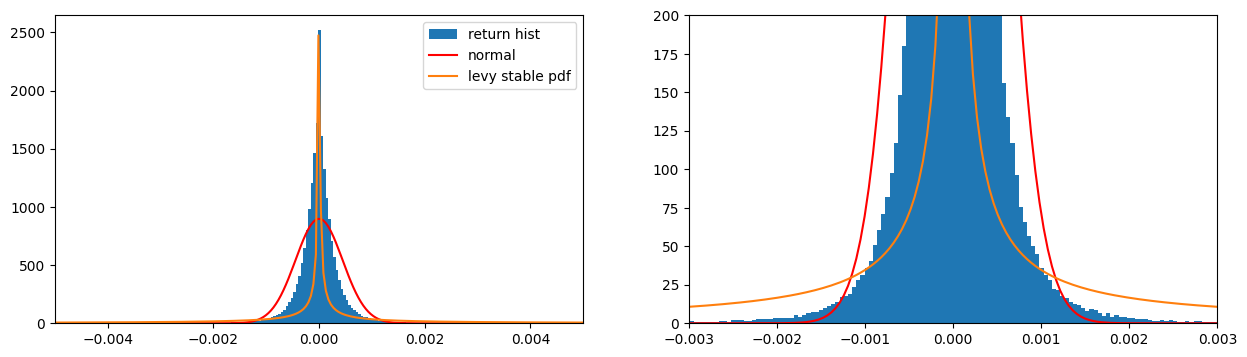

In [3]:
#normalized_r_array = (r_array - np.mean(r_array))/(np.sqrt(len(r_array))*np.std(r_array))
sigma=np.std(r_array)
mu = np.mean(r_array)
fig,ax=plt.subplots(1,2,figsize=(15,4))
prob, bins, patches =ax[0].hist(r_array,bins=1000,density=True,label="return hist")
normal = sci.stats.norm.pdf(bins,mu,sigma)
stable = sci.stats.levy_stable.pdf(bins, 0.2, 0,scale=sigma/np.sqrt(2))

ax[0].plot(bins,normal,color='r',label="normal")
ax[0].plot(bins, stable, label='levy stable pdf')
ax[0].legend()
ax[0].set_xlim(-0.005,0.005)

ax[1].hist(r_array,bins=1000,density=True,label="return hist")
ax[1].plot(bins,normal,color='r',label="normal")
ax[1].plot(bins,stable, label='levy stable pdf')
ax[1].set_xlim(-0.003,0.003)
ax[1].set_ylim(0,200)

C:\Users\std92\AppData\Local\Temp\ipykernel_5708\1650086937.py:8: RuntimeWarning: divide by zero encountered in log
  plt.plot(bins,np.log(normal),color="r",label="log normal")


Text(0.5, 1.0, 'log pdf comparison')

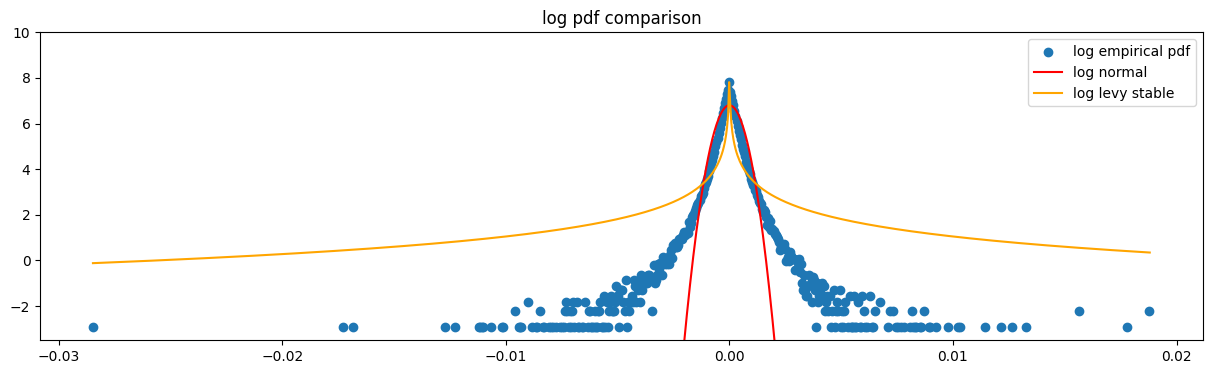

In [4]:
empirical_dict={bins[i]:prob[i] for i in range(len(bins)-1)}
empirical_dict={key: value for key, value in empirical_dict.items() if value != 0}
log_empirical_pdf = np.log(np.array(list(empirical_dict.values())))
bins_nonzero = np.array(list(empirical_dict.keys()))

plt.figure(figsize=(15,4))
plt.scatter(bins_nonzero,log_empirical_pdf,label="log empirical pdf")
plt.plot(bins,np.log(normal),color="r",label="log normal")
plt.plot(bins,np.log(stable),color="orange",label="log levy stable")
plt.ylim(-3.5,10)
plt.legend()
plt.title("log pdf comparison")

### Stylized fact: different time scale
It has been observed that as one increases the time scale over which the returns are calculated, the fat-tail property becomes less pronounced, and their distribution approaches the Gaussian form. This is because the variance is usually finite and CLT applies.
The graph compare the tails of log empirical distributions with different time scales and the normal distributions with corresponding
means and variances.

C:\Users\std92\AppData\Local\Temp\ipykernel_5708\1562856793.py:18: RuntimeWarning: divide by zero encountered in log
  ax[0].scatter(bins_edge[:-1],np.log(prob),label="return in 1m")
C:\Users\std92\AppData\Local\Temp\ipykernel_5708\1562856793.py:19: RuntimeWarning: divide by zero encountered in log
  ax[0].plot(bins_edge[:-1],np.log(normal_1m),color='r',label="normal ")
C:\Users\std92\AppData\Local\Temp\ipykernel_5708\1562856793.py:20: RuntimeWarning: divide by zero encountered in log
  ax[1].scatter(bins_edge_10m[:-1],np.log(prob_10m),label="return in 10m")
C:\Users\std92\AppData\Local\Temp\ipykernel_5708\1562856793.py:22: RuntimeWarning: divide by zero encountered in log
  ax[2].scatter(bins_edge_1h[:-1],np.log(prob_1h),label="return in 1h")


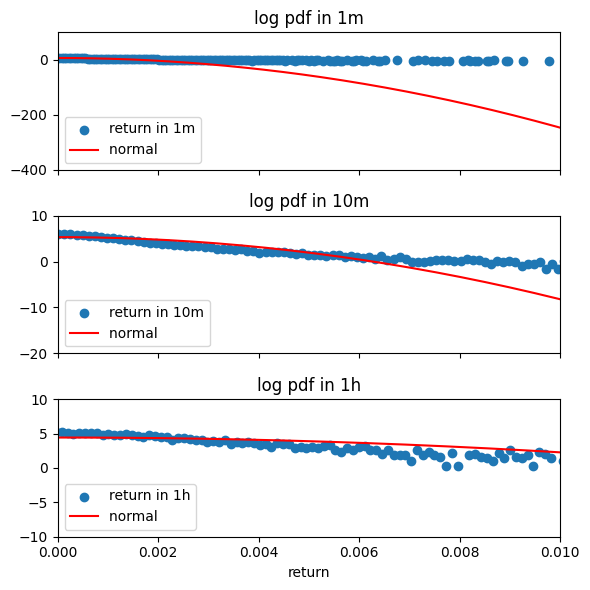

In [5]:
fig,ax=plt.subplots(3,1,figsize=(6,6),sharex=True)
r_array_10m =  np.diff( np.log(price_array)[::10])
r_array_1h =  np.diff( np.log(price_array)[::60])
sigma_10m=np.std(r_array_10m)
mu_10m = np.mean(r_array_10m)
sigma_1h=np.std(r_array_1h)
mu_1h = np.mean(r_array_1h)


prob ,bins_edge = np.histogram(r_array,bins=1000,density=True)
prob_10m ,bins_edge_10m = np.histogram(r_array_10m,bins=1000,density=True)
prob_1h ,bins_edge_1h = np.histogram(r_array_1h -mu_1h ,bins=1000,density=True)

normal_1m = sci.stats.norm.pdf(bins_edge[:-1],mu,sigma)
normal_10m = sci.stats.norm.pdf(bins_edge_10m[:-1],mu_10m,sigma_10m)
normal_1h = sci.stats.norm.pdf(bins_edge_1h[:-1],mu_1h,sigma_1h)

ax[0].scatter(bins_edge[:-1],np.log(prob),label="return in 1m")
ax[0].plot(bins_edge[:-1],np.log(normal_1m),color='r',label="normal ")
ax[1].scatter(bins_edge_10m[:-1],np.log(prob_10m),label="return in 10m")
ax[1].plot(bins_edge_10m[:-1],np.log(normal_10m),color='r',label="normal ")
ax[2].scatter(bins_edge_1h[:-1],np.log(prob_1h),label="return in 1h")
ax[2].plot(bins_edge_1h[:-1],np.log(normal_1h),color='r',label="normal ")

ax[0].set_ylim(-400,100)
ax[1].set_ylim(-20,10)
ax[2].set_ylim(-10,10)
ax[2].set_xlim(0,0.01)
ax[0].set_title("log pdf in 1m")
ax[1].set_title("log pdf in 10m")
ax[2].set_title("log pdf in 1h")

ax[2].set_xlabel("return")
ax[0].legend()
ax[1].legend()
ax[2].legend()

plt.tight_layout()    


###  Stylized fact: decay of autocorrelation function 
There is no evidence of correlation between successive returns. The autocorrelation function decays very soon to zero.
For long lag, acf is roughly bounded by $\pm 10\sigma$.

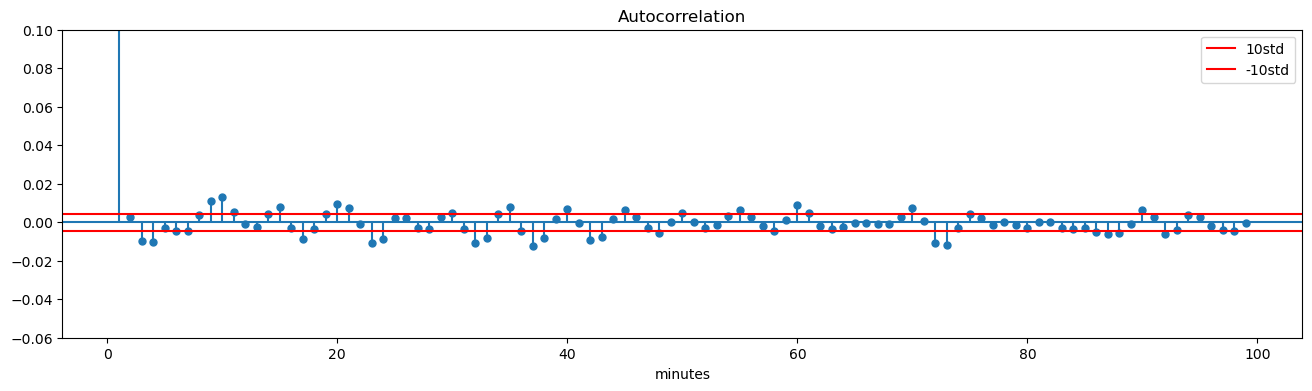

In [310]:
from statsmodels.graphics.tsaplots import plot_acf
ACF=plot_acf(r_array , lags=np.arange(1,100) ,alpha=None )
ACF.set_figwidth(16)
ACF.set_figheight(4)
plt.ylim(-0.06,0.1)
plt.axhline(y=10*np.std(r_array),color='r',label="10std")
plt.axhline(y=-10*np.std(r_array),color='r',label="-10std")
plt.xlabel("minutes")
plt.legend()

#### ACF of absolute value/square return
Absolute value returns or squared returns exhibit a long-range slowly decaying auto correlation function. This phenomena is widely known as **volatility clustering**, and was formulated as "large changes tend to be followed by large changes – of either sign – and small changes tend to be followed by small changes". The following graphs show the acfs of absolute return and square that can be approximated by the slowly decaying power law functions in $x^{−\alpha}$, with $\alpha \simeq 0.5$ for absolute value returns and
$\alpha \simeq 0.7$ for square returns

C:\Users\std92\AppData\Local\Temp\ipykernel_13440\841509111.py:5: RuntimeWarning: divide by zero encountered in scalar power
  fitting_1=np.array([  0.6*lag**(-0.5) for lag in np.linspace(0,100,1000)])
C:\Users\std92\AppData\Local\Temp\ipykernel_13440\841509111.py:6: RuntimeWarning: divide by zero encountered in scalar power
  fitting_2=np.array([  0.1*lag**(-0.7) for lag in np.linspace(0,100,1000)])


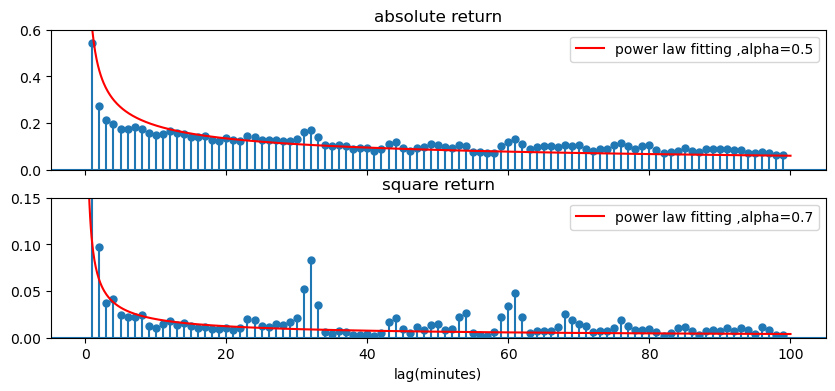

In [451]:
fig,ax = plt.subplots(2,1,figsize=(10,4),sharex=True)
plot_acf( abs(r_array)[:10000] , lags=np.arange(1,100) ,alpha=None,ax=ax[0] )
plot_acf((r_array**2)[:10000] , lags=np.arange(1,100) ,alpha=None,ax=ax[1] )
lag_array=np.linspace(0,100,1000)
fitting_1=np.array([  0.6*lag**(-0.5) for lag in np.linspace(0,100,1000)])
fitting_2=np.array([  0.1*lag**(-0.7) for lag in np.linspace(0,100,1000)])

ax[0].set_title("absolute return")
ax[0].plot(lag_array  , fitting_1, color ="r",label="power law fitting ,alpha=0.5")
ax[0].set_ylim(0,0.6)
ax[1].set_title("square return")
ax[1].plot(lag_array  , fitting_2, color ="r",label="power law fitting ,alpha=0.7")

ax[1].set_xlabel("lag(minutes)")
ax[1].set_ylim(0,0.15)
ax[0].legend()
ax[1].legend()

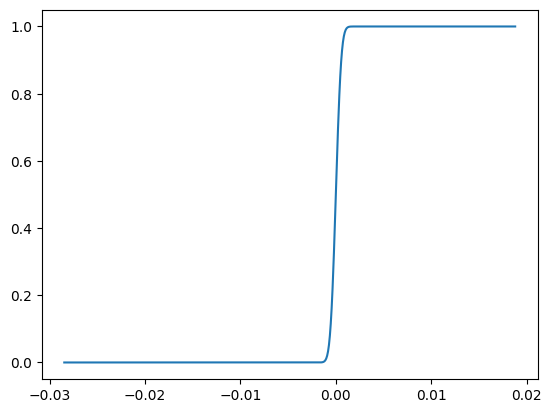

In [9]:
plt.plot(bins,sci.stats.norm.cdf(bins,0,sigma),label='normal')


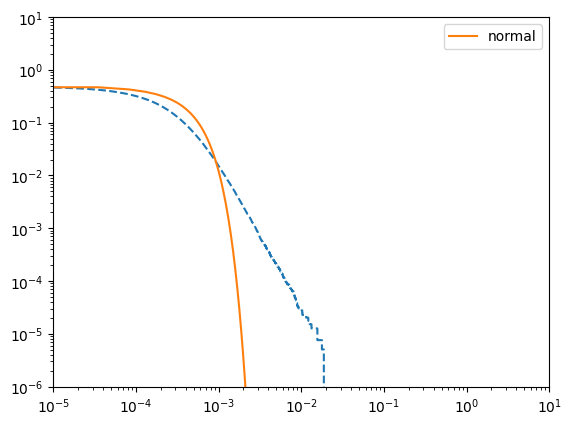

In [15]:
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**(-5),10)
plt.ylim(10**(-6),10)
plt.ecdf(r_array,complementary=True,ls='--')
plt.plot(bins,1-sci.stats.norm.cdf(bins,0,sigma),label='normal')
plt.legend()

In [16]:
bins

array([-0.02846958, -0.02842231, -0.02837504, ...,  0.01870718,
        0.01875446,  0.01880173])